# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [21]:
# loading the dataset 
fordbike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [22]:
# defining a function to explore and summarize datasets

def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the data type, # of null rows and unique rows of a given dataframe
    
    Args: 
        A dataframe of n_rows and n_columns
    Returns:
        A dataframe of 4 columns [data_type, non-null-rows, unique_rows, missing_rows]
    """
    concat = pd.concat(
        [df.dtypes.to_frame(), df.count().to_frame(), df.nunique(), df.isnull().sum()], axis=1
    )
    concat.columns = ['data_type', 'non-null-rows', 'unique_rows', 'missing_rows']
    return concat

In [23]:
# creating a new copy so we can revert to original data if needed after all the cleaning
bike_df = fordbike.copy()

# summarizing the dataset
summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,183412,4752,0
start_time,object,183412,183401,0
end_time,object,183412,183397,0
start_station_id,float64,183215,329,197
start_station_name,object,183215,329,197
start_station_latitude,float64,183412,334,0
start_station_longitude,float64,183412,335,0
end_station_id,float64,183215,329,197
end_station_name,object,183215,329,197
end_station_latitude,float64,183412,335,0


## Cleaning and transforming the Dataset

We are going to perform the following data cleaning/preparations on the dataset:
<br><br>
1- Choosing the appropriate/correct datatypes.<br>
2- adding a column called "age" to show the users' ages.<br>
3- modifying some columns' date/time formats for readability and analysis

**Casting into appropriate datatypes**

In [24]:
# casting the following variables into their correct/appropriate datatypes
bike_df = (
    bike_df
    .astype({'start_time': 'datetime64[ns]',
             'end_time': 'datetime64[ns]',
             'start_station_id': 'str',
             'end_station_id': 'str',
             'bike_id': 'str',
             'member_gender': 'category',
             'user_type': 'category'})
)

**Creating new columns based on the start_time**

In [25]:
# adding age of riders 'age' column into dataset
# adding new columns - 'date, hour, day and month' for datetime formats
bike_df = (
    bike_df
    .assign(age=lambda a: 2022-a.member_birth_year,
            start_date=lambda sd: sd.start_time.dt.strftime('%Y-%m-%d'),
            start_hour=lambda x: x.start_time.dt.strftime('%H'),
            start_day=lambda x: x.start_time.dt.strftime('%A'),
            start_month=lambda x: x.start_time.dt.strftime('%B'))
)

summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,183412,4752,0
start_time,datetime64[ns],183412,183401,0
end_time,datetime64[ns],183412,183397,0
start_station_id,object,183412,330,0
start_station_name,object,183215,329,197
start_station_latitude,float64,183412,334,0
start_station_longitude,float64,183412,335,0
end_station_id,object,183412,330,0
end_station_name,object,183215,329,197
end_station_latitude,float64,183412,335,0


In [26]:
# seems like there are missing rows in our age dataset, we will remove these columns
bike_df[bike_df['age'].isnull()].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour,start_day,start_month
78222,458,2019-02-18 20:23:03.098,2019-02-18 20:30:41.646,114.0,Rhode Island St at 17th St,37.764478,-122.402570,125.0,20th St at Bryant St,37.759200,...,6537,Customer,NaN,NaN,No,NaN,2019-02-18,20,Monday,February
33079,1015,2019-02-24 12:44:01.810,2019-02-24 13:00:56.999,73.0,Pierce St at Haight St,37.771793,-122.433708,141.0,Valencia St at Cesar Chavez St,37.747998,...,5145,Subscriber,NaN,NaN,No,NaN,2019-02-24,12,Sunday,February
32733,2242,2019-02-24 13:12:16.122,2019-02-24 13:49:38.395,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,371.0,Lombard St at Columbus Ave,37.802746,...,567,Customer,NaN,NaN,No,NaN,2019-02-24,13,Sunday,February
72391,541,2019-02-19 16:28:32.483,2019-02-19 16:37:34.367,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,58.0,Market St at 10th St,37.776619,...,4975,Subscriber,NaN,NaN,No,NaN,2019-02-19,16,Tuesday,February
4091,706,2019-02-28 16:24:11.601,2019-02-28 16:35:57.787,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,267.0,Derby St at College Ave,37.861804,...,4700,Customer,NaN,NaN,No,NaN,2019-02-28,16,Thursday,February


In [27]:
# removing null/na numbers of members without age
bike_df = bike_df.dropna(subset=['age'])
# casting age into appropriate datatype (int)
bike_df = bike_df.astype({'age': 'int32'})

summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,175147,4432,0
start_time,datetime64[ns],175147,175136,0
end_time,datetime64[ns],175147,175134,0
start_station_id,object,175147,330,0
start_station_name,object,174952,329,195
start_station_latitude,float64,175147,334,0
start_station_longitude,float64,175147,335,0
end_station_id,object,175147,330,0
end_station_name,object,174952,329,195
end_station_latitude,float64,175147,335,0


### What is the structure of your dataset?

> Every dataset corresponds to a single, distinct journey made by a user during the month of February. It includes the journey's beginning, ending, duration, and other spatial information. There are around 183k records over 16 different variables. With about 183k records, there are a total of 16 variables. Three major groups of these records can be broadly divided:
<br><br>
1- Timeseries data - e.g, duration_sec, start/end_time, birth_year<br>
2- Spatial data - e.g, start/end_station_longitude/latitude<br>
3- Member information - gender, age<br>
4- Derived features - start_date/hour/day

### What is/are the main feature(s) of interest in your dataset?

> Understanding riders' usage patterns, which take into account their ride characteristics (e.g. the user's profile (e. g., trip durations) and other data (e. g, age, gender, and user_type).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Understanding the usage patterns will be aided by the start and end time variables. We can also learn which days are the most popular with users thanks to start_day/month. The member data, such as user type, gender, and age, will assist us in identifying the main target customer segments. We can then use the various groups to summarize the data on bike usage to check for any distinctive patterns related to particular riding communities.

In [28]:
# overview of dataset
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour,start_day,start_month
121784,410,2019-02-11 14:02:29.734,2019-02-11 14:09:19.865,130.0,22nd St Caltrain Station,37.757288,-122.392051,345.0,Hubbell St at 16th St,37.766483,...,5541,Subscriber,1987.0,Male,No,35,2019-02-11,14,Monday,February
61665,961,2019-02-20 17:23:58.929,2019-02-20 17:40:00.508,36.0,Folsom St at 3rd St,37.783830,-122.398870,115.0,Jackson Playground,37.765026,...,4413,Subscriber,1991.0,Female,No,31,2019-02-20,17,Wednesday,February
101706,334,2019-02-14 17:20:33.503,2019-02-14 17:26:07.719,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,59.0,S Van Ness Ave at Market St,37.774814,...,6348,Customer,1993.0,Male,No,29,2019-02-14,17,Thursday,February
139408,948,2019-02-07 21:07:34.384,2019-02-07 21:23:23.035,92.0,Mission Bay Kids Park,37.772301,-122.393028,92.0,Mission Bay Kids Park,37.772301,...,5547,Subscriber,1968.0,Male,No,54,2019-02-07,21,Thursday,February
71602,299,2019-02-19 17:24:17.057,2019-02-19 17:29:16.654,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,...,5089,Subscriber,1996.0,Female,Yes,26,2019-02-19,17,Tuesday,February


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [29]:
# define a default chart size for all visualizations
plt.rcParams["figure.figsize"] = (9,7)
# seaborn plot size
plt.figure(figsize=[9, 7])



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

## Visualization 1: What is the distribution of rides by user_type?

Text(0.5,1,'Distribution of rides by usertype')

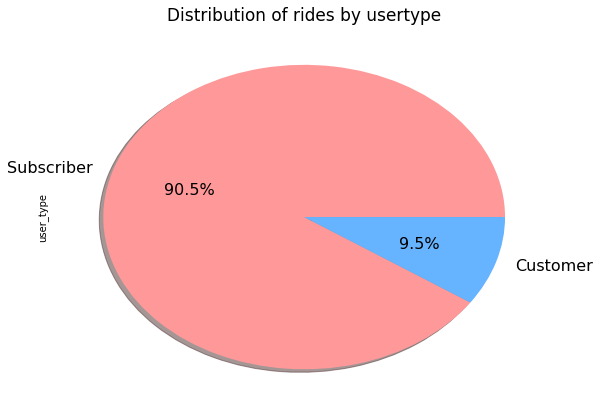

In [30]:
# segmenting out our dataset for the pie plot
bike_df.user_type.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=['#ff9999','#66b3ff'], fontsize=16)
# naming the line chart
plt.title("Distribution of rides by usertype", fontsize=17)

As observed, a significant majority of rides were completed by subscribers (90.5%) as compared to customers at 9.5%.

### Visualization 2: What is the trip distribution over the hours of a day?

Text(0,0.5,'Frequency')

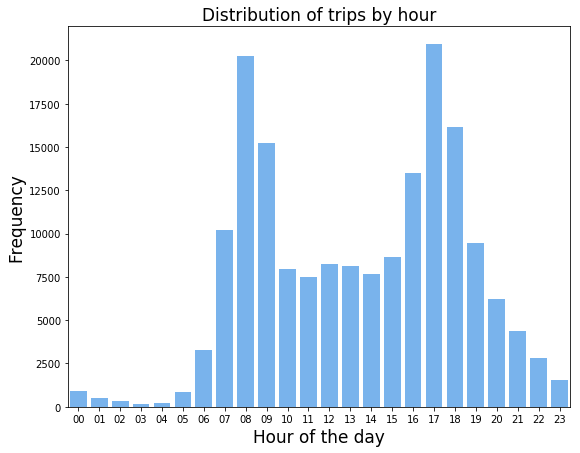

In [31]:
trip_hour_distribution = sns.countplot(data=bike_df, x='start_hour', color='#66b3ff')

# set title of plot
trip_hour_distribution.axes.set_title('Distribution of trips by hour', fontsize=17)
# set x_label of plot
trip_hour_distribution.axes.set_xlabel('Hour of the day', fontsize=17)
# set y_label of plot
trip_hour_distribution.axes.set_ylabel('Frequency', fontsize=17)

Trips peaked around 8am and 5pm, which seems to be during the rush hour periods.



## Visualization 3: What is the trip distribution over days of the week?

Text(0,0.5,'Frequency')

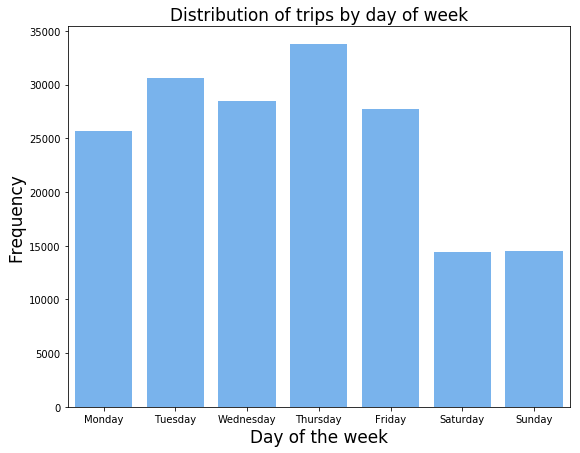

In [32]:
# defining days of the week for our chart
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# declaring the day list as ordered data
days_of_week_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
bike_df = bike_df.astype({'start_day': days_of_week_cat})

# defining the countplot
trip_day_distribution = sns.countplot(data=bike_df, x='start_day', color='#66b3ff')

# set title of plot
trip_day_distribution.axes.set_title('Distribution of trips by day of week', fontsize=17)
# set x_label of plot
trip_day_distribution.axes.set_xlabel('Day of the week', fontsize=17)
# set y_label of plot
trip_day_distribution.axes.set_ylabel('Frequency', fontsize=17)

Trips typically happened more during the weekdays rather than the weekends.

## Visualization 4: What is the trip distribution of days in the month of February?

Text(0,0.5,'Frequency')

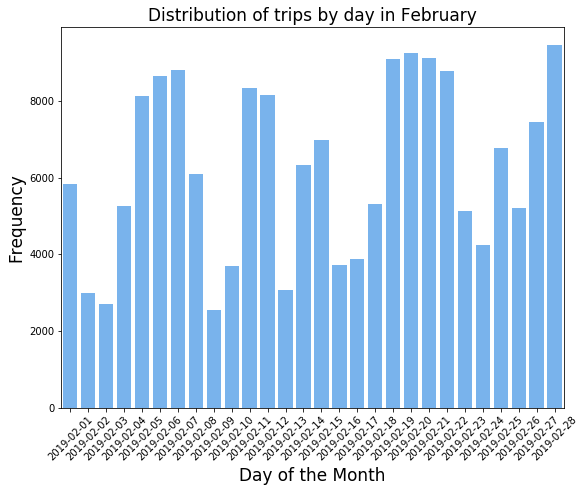

In [33]:
# defining days of the month for our chart
days_of_month = bike_df.start_date.unique().tolist().reverse()
days_of_month_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_month)
bike_df = bike_df.astype({'start_date': days_of_month_cat})

# defining the countplot
trip_month_distribution = sns.countplot(data=bike_df, x='start_date', color='#66b3ff')
# rotation x-axis for clarity
plt.xticks(rotation=45)
# set title of plot
trip_month_distribution.axes.set_title('Distribution of trips by day in February', fontsize=17)
# set x_label of plot
trip_month_distribution.axes.set_xlabel('Day of the Month', fontsize=17)
# set y_label of plot
trip_month_distribution.axes.set_ylabel('Frequency', fontsize=17)

Dips in the trip frequency throughout the month seems to coincide with the weekends.

### Visualization 5: What is the distribution of trips by member age?

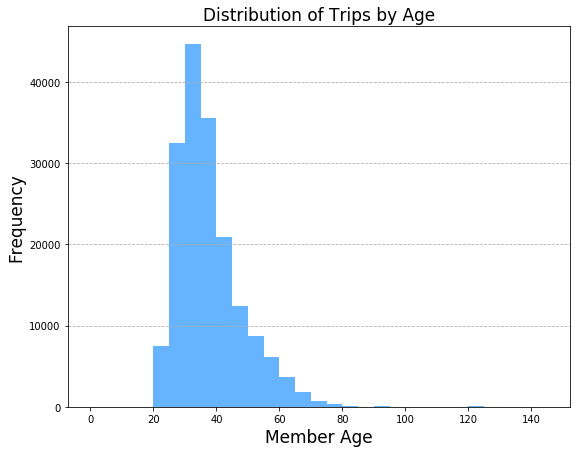

In [34]:
bins = np.arange(0, bike_df['age'].max()+5, 5)
plt.hist(data=bike_df, x='age', bins=bins, color='#66b3ff')

# set title of the histogram
plt.title('Distribution of Trips by Age', fontsize=17)
# set x_label of plot
plt.xlabel('Member Age', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

Fewer individuals in their 20s, but interestingly there seems to be datapoints for users at age > 100. Might be an error.

## Visualization 6: What is the distribution of trip by duration (seconds)?

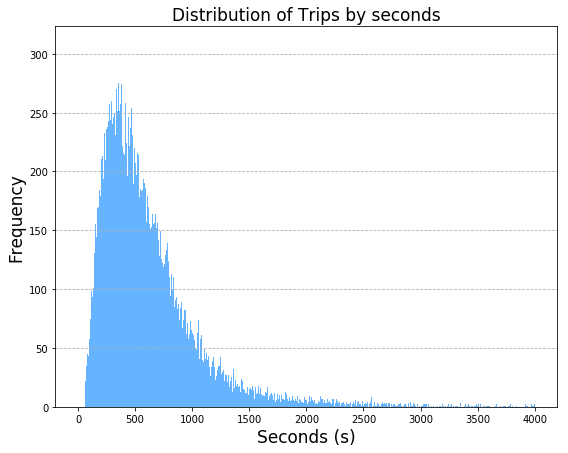

In [35]:
bins = np.arange(0, 4000, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=bike_df, x='duration_sec', bins=bins, color='#66b3ff')

# set title of the histogram
plt.title('Distribution of Trips by seconds', fontsize=17)
# set x_label of plot
plt.xlabel('Seconds (s)', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')


From the histogram, it seems that the distribution of trips duration is right skewed. This tells us most trips are concentrated around the 500-700 seconds duration (8~11 minutes long). This might indicate that individuals typically use the bikes for specific use cases rather than leisure.

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

Trips typically peaked around 8am and 5pm, which seems to be the rush hour time period for working/schooling individuals. There were also significantly more subscribers (90+%) than customers in our dataset.
<br><br>
Most rides happened during the weekdays (Mon-Fri) and were short in duration (< 10 minutes) per trip. Also, a large proportion of users age were around late 30s to early 40s.

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

The trip duration seems to have some extreme outliers that skewed the chart, this is something that I will attempt to clean in the bivariate exploration stage when the issue becomes more apparent.

## Bivariate Exploration

**Visualization 7: What is the age distribution of bike users membership type?**

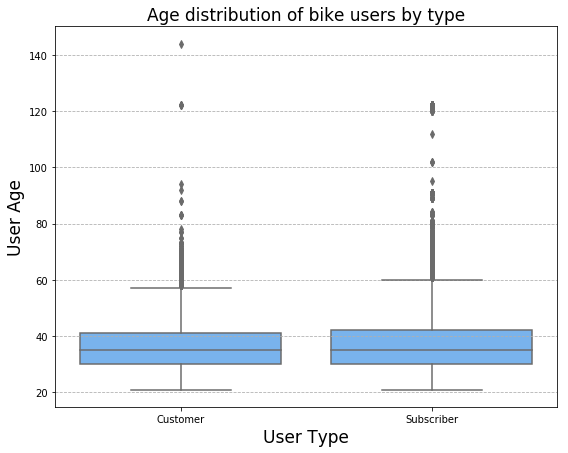

In [36]:
sns.boxplot(data=bike_df, x='user_type', y='age', color='#66b3ff')

# set title of the histogram
plt.title('Age distribution of bike users by type', fontsize=17)
# set x_label of plot
plt.xlabel('User Type', fontsize=17)
# set y_label of plot
plt.ylabel('User Age', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

The median user age and age distribution between Customer and Subscribers are quite similar.

## Visualization 8: Average trip duration by day of the week

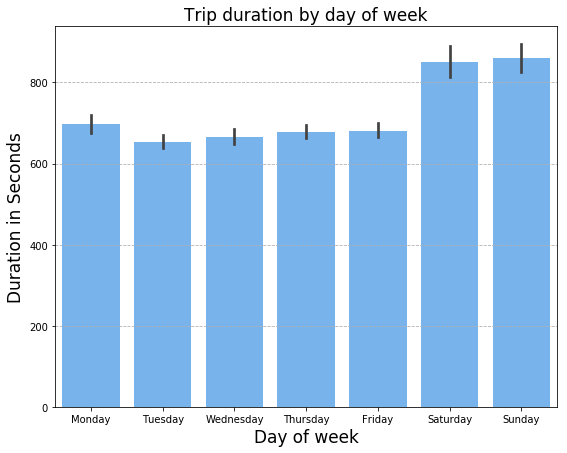

In [37]:
sns.barplot(data=bike_df, x='start_day', y='duration_sec', color='#66b3ff')

# set title of the barplot
plt.title('Trip duration by day of week', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Duration in Seconds', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

Even though more trips happened during weekdays, the duration of each trip seems to be longer during the weekends. This is very interesting insights.

## Visualization 9: Average trip duration by Gender

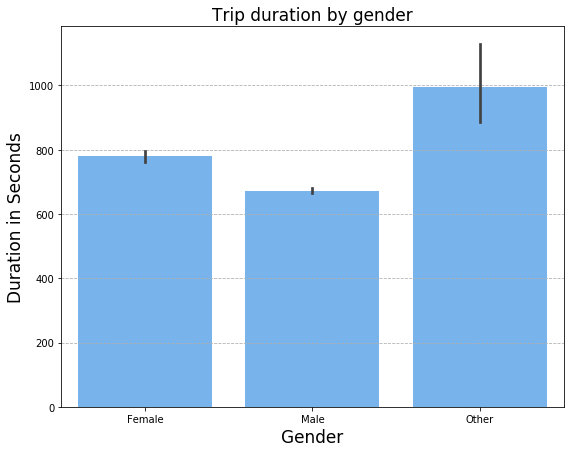

In [38]:
sns.barplot(data=bike_df, x='member_gender', y='duration_sec', color='#66b3ff')

# set title of the barplot
plt.title('Trip duration by gender', fontsize=17)
# set x_label of plot
plt.xlabel('Gender', fontsize=17)
# set y_label of plot
plt.ylabel('Duration in Seconds', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 10: Frequency of trips between user types by hour

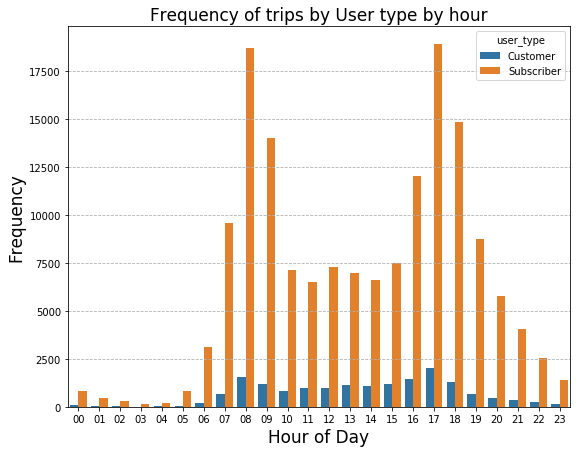

In [41]:
sns.countplot(data=bike_df, x='start_hour', hue='user_type')

# set title of the barplot
plt.title('Frequency of trips by User type by hour', fontsize=17)
# set x_label of plot
plt.xlabel('Hour of Day', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 11: Frequency of trips between user types by day

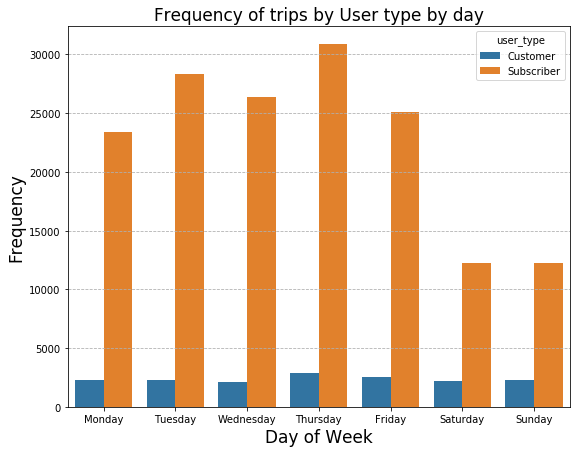

In [42]:
sns.countplot(data=bike_df, x='start_day', hue='user_type')

# set title of the barplot
plt.title('Frequency of trips by User type by day', fontsize=17)
# set x_label of plot
plt.xlabel('Day of Week', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 12: Distribution of users' age by Day of the week

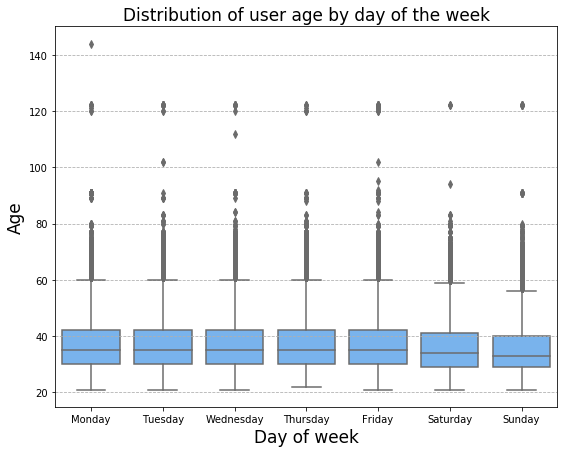

In [43]:
sns.boxplot(data=bike_df, x='start_day', y='age', color='#66b3ff')

# set title of the barplot
plt.title('Distribution of user age by day of the week', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Age', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 13: Distribution of trip durations by user type

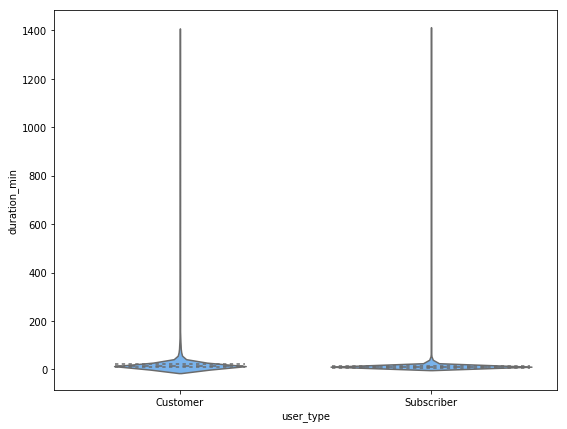

In [44]:
# creating a minute column
bike_df['duration_min'] = bike_df['duration_sec']/60

# trying to create a violin plot of distribution by minute
sns.violinplot(data=bike_df, x='user_type', y='duration_min', color='#66b3ff', inner='quartile')

The duration (in minutes) seems to be extremely skewed by outliers, we will attempt to remove it in the next step.

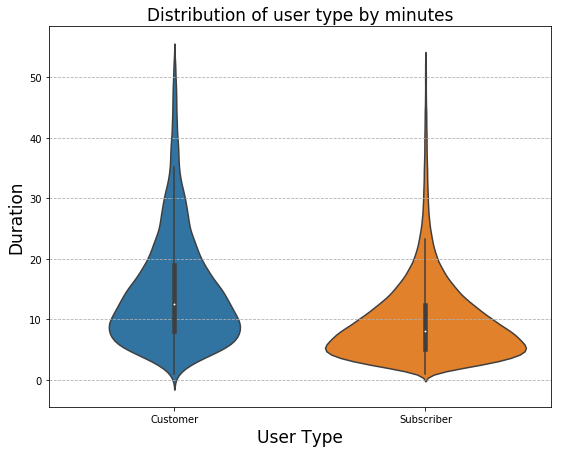

In [45]:
# we partition the distribution up till the 99th quantile, allowing us to filter out all the extreme outliers
q = bike_df['duration_min'].quantile(0.99)

# filtering out for extreme outliers
duration_outliers_removed = bike_df[bike_df['duration_min'] < q]

# creating our violin plot
sns.violinplot(data=duration_outliers_removed, x='user_type', y='duration_min')

# set title of the barplot
plt.title('Distribution of user type by minutes', fontsize=17)
# set x_label of plot
plt.xlabel('User Type', fontsize=17)
# set y_label of plot
plt.ylabel('Duration', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

After plotting our distribution, we can identify the following:
<br><br>
1- Customers had a higher median ride duration as compared to subscribers (as denoted by the white dot in our violinplot).
<br>
2- As the "width" of the violin plot represents the kernel density estimation of our dataset, we can conclude that Subscribers have a higher probability of taking shorter trips - as denoted by the thicker sections around the 5min duration range while Customers have a higher probability of taking trips closer to that of 10 minutes.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

More people use subscription services than customers do. Customers and subscribers have very distinct riding patterns and habits. Because they use the bike sharing system for commuting, subscribers made the majority of trips on workdays (Mon-Fri), especially during rush hours (when going to work in the morning and getting off work in the afternoon. Customers typically ride for fun in the afternoon or early evening on weekends.

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

It's interesting to observe that subscribers typically ride much faster and shorter distances than typical customers. Additionally, subscribers used their bikes more frequently on weekdays than on weekends, suggesting that they might be using them for commuting to work or school rather than for leisure.

## Multivariate Exploration

## Visualization 14: Average trip duration in days of the week between user types

Text(0,0.5,'Trip Duration (min)')

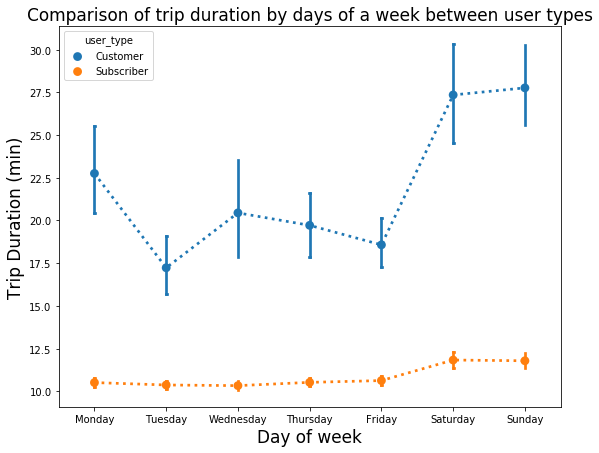

In [46]:
# creating our pointplot
sns.pointplot(data=bike_df, x='start_day', y='duration_min', hue='user_type', capsize=0.01, linestyles=":")

# set title of the barplot
plt.title('Comparison of trip duration by days of a week between user types', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Trip Duration (min)', fontsize=17)

As observed from the point plot, in general:
<br><br>
1- Customers took longer trips as compared to Subscribers.<br>
2- On weekends, there is an increase in trip duration (though it is more pronounced in customers).<br>
3- The error bars reveal the measure of central tendency for both user types, showing that customers typically have a much wider range in trip duration, as opposed to subscribers, who had a much more concentrated data spread. This finding suggests that users are more likely to have a trip duration that is close to the median.
<br><br>
This may be because of how long bikes can ride on each trip (e. G, After the daily free trip period, subscribers must pay for additional trips. ).

## Visualization 15: Hourly usage between user types across days of the week

In [47]:
# defining a function to transform our dataset
def heatmap_transform(df: pd.DataFrame, target:str) -> pd.DataFrame:
    """
    Returns a pivot table of frequency count per day, by the hour
    
    Args: 
        df - A dataframe of n_rows and n_columns
        target - user type we are interested in filtering for
    Returns:
        A pivot table
    """
    
    transformed_df = (
        df
        # filter out for given target argument
        .query(f'user_type == "{target}"')
        .groupby(['start_day', 'start_hour'])
        .size()
        .reset_index(name='count')
        .pivot(index='start_day', columns='start_hour', values='count')
        .fillna(0)
    )
    
    return transformed_df

In [48]:
cust_count = heatmap_transform(bike_df, 'Customer')
subs_count = heatmap_transform(bike_df, 'Subscriber')

# sample of transformed pivot table
subs_count

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Monday,86,43,39,20,37,124,556,1545,2966,2062,...,784,1047,1782,2997,2193,1331,861,561,346,172
Tuesday,77,51,31,17,30,169,656,2061,3929,3043,...,968,1072,2018,3656,2919,1543,1045,622,325,164
Wednesday,75,43,29,14,25,152,530,1707,3332,2416,...,859,982,1960,3500,2836,1682,1069,815,473,214
Thursday,109,41,26,19,40,165,661,2121,4167,2569,...,1008,1241,2357,4065,3300,1800,1282,819,489,277
Friday,131,77,55,28,40,138,578,1822,3583,2726,...,786,1089,1862,2766,2071,1109,621,466,430,256
Saturday,187,145,66,22,19,25,88,188,442,699,...,1076,981,917,930,711,592,395,363,252,201
Sunday,137,81,72,33,19,26,50,137,289,519,...,1104,1067,1125,980,825,691,492,415,252,133


Text(60,0.5,'Hour of day')

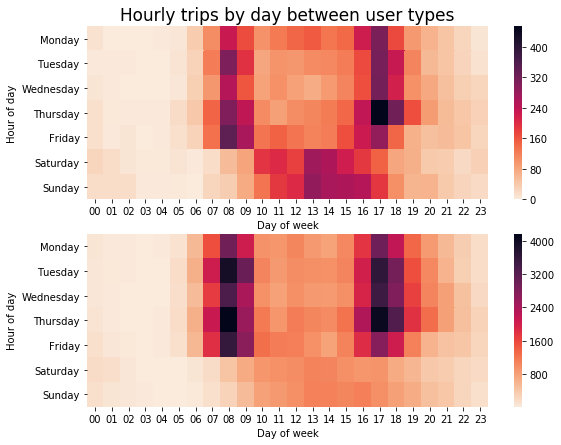

In [49]:
# defining subplot 1
plt.subplot(2,1,1)
sns.heatmap(cust_count, cmap='rocket_r')
# set x_label of plot 1
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 1
plt.ylabel('Hour of day', fontsize=10)

# set title of the barplot
plt.title('Hourly trips by day between user types', fontsize='17')

# defining subplot 2
plt.subplot(2,1,2)
sns.heatmap(subs_count, cmap='rocket_r')
# set x_label of plot 2
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 2
plt.ylabel('Hour of day', fontsize=10)

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

In order to strengthen some of the patterns found in the previous bivariate analysis as well as in the univariate analysis, the relationship between the various variables plotted is seen collectively and information is displayed simultaneously. In line with their high levels of concentration during Monday through Friday rush hours, subscribers' efficient/short periods of consumption indicate that the use is primarily for commuting to work. Customers clearly use the bike sharing system very differently from subscribers, frequently on weekends and in the afternoons, probably for leisure or city tours, as seen by the more flexible and lax pattern of their usage.

**Were there any interesting or surprising interactions between features?**

There are no major surprises when all the interactions between the features are taken into account because they all complement one another and make sense. There may not be a significant difference in usage patterns between men and women throughout the investigation because there are disproportionately more female riders and records than male ones. If we were able to obtain a more balanced dataset between the two genders, it would be interesting to observe the differences in usage between men and women. This would require more female data.

## Conclusions
>On the bike sharing dataset, we ran three levels of analysis and visualization—Univariate, Bivariate, and Multivariate. In order to better visualize the dataset and produce insights, we also eliminated extreme outliers during the exercise.